My Analysis

1.  There is a positive correlation between the average tumor volume (mm3) and the weight of the mice. This means that fatter mice will have a tendency to have larger tumor volumes on average.
2. Capomulin is an effective drug since the volume of tumor at the beginning pf the treament is smaller than at the end of the treatment.This is observed in the line graph of volume of tumor v/s timepoint in days.
3. From the boxplot, we can conclude that:
a. Capomulin and Ramicane are far more effective drugs than Ceftamin and Infubinol because they have much lower medians, indicating that the volume of tumor has reduced considerably as compared to the other 2.
 b. Capomulin and Ramicane both show consistent results since they have a shorter interquartile range as compared to Ceftamin and Infubinol.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df=pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice in merged df.
total_count=df["Mouse ID"].count()
total_count

1893

In [3]:
# Checking the number of unique mice in merged df.
mice_count=len(df["Mouse ID"].unique())
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_ID=df.loc[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False), "Mouse ID"].unique()
duplicated_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
for ID in duplicated_ID:
    dub_MouseID_df=df.loc[df["Mouse ID"]==ID, :]
dub_MouseID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for ID in duplicated_ID:
    clean_df=df.loc[df["Mouse ID"]!=ID,:]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_count=len(clean_df["Mouse ID"].unique())
new_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_volume_df=clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_mean_df=tumor_volume_df.groupby("Drug Regimen").mean()
tumor_median_df=tumor_volume_df.groupby("Drug Regimen").median()
tumor_variance_df=tumor_volume_df.groupby("Drug Regimen").var()
tumor_std_df=tumor_volume_df.groupby("Drug Regimen").std()
tumor_SEM_df=tumor_volume_df.groupby("Drug Regimen").sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_stat_df = pd.concat([tumor_mean_df, tumor_median_df, tumor_variance_df, tumor_std_df, tumor_SEM_df], axis=1)

# Renaming columns
tumor_stat_df.columns = [
    "Mean Tumor Volume", 
    "Median Tumor Volume", 
    "Tumor Volume Variance", 
    "Tumor Volume Std Dev.", 
    "Tumor Volume Std Err."]

tumor_stat_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stat2_df = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_stat2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


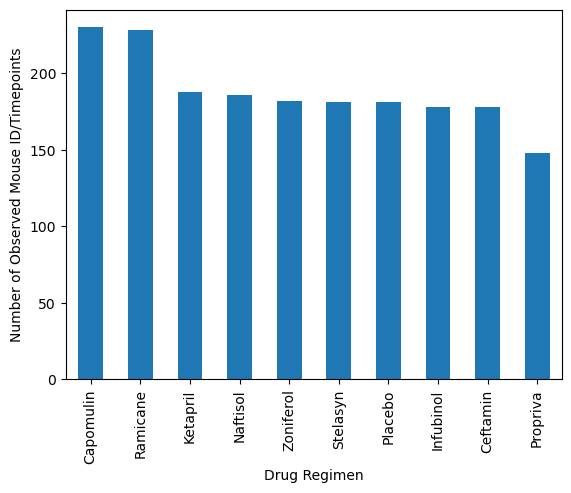

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data=clean_df["Drug Regimen"].value_counts()
plot1=bar_data.plot(kind="bar", ylabel="Number of Observed Mouse ID/Timepoints")

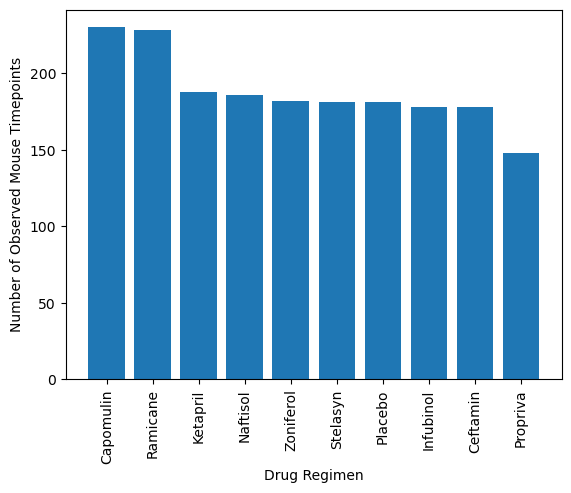

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_val=clean_df["Drug Regimen"].value_counts().index
y_val=clean_df["Drug Regimen"].value_counts().values
plt.bar(x_val,y_val, color='#1f77b4', align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

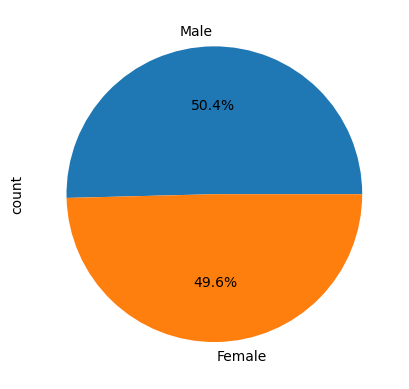

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

unique_ID_data=clean_df.drop_duplicates(subset=["Mouse ID"], keep="first", inplace=False)
sex_count=unique_ID_data["Sex"].value_counts()

# Make the pie chart

pie_plot=sex_count.plot(kind="pie", autopct='%1.1f%%', startangle=0 )

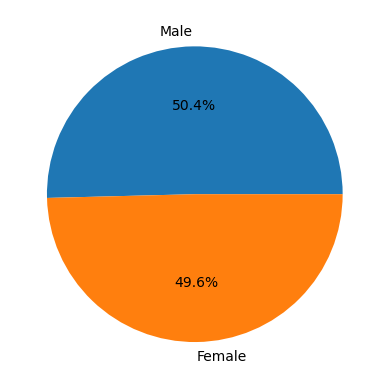

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

female_count=unique_ID_data.loc[unique_ID_data["Sex"]=="Female","Sex"].count()
male_count=unique_ID_data.loc[unique_ID_data["Sex"]=="Male","Sex"].count()


# Make the pie chart

labels=["Male", "Female"]
sizes=[male_count, female_count]
colors=["#1f77b4", "#ff7f0e"]
explode=[0,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
grouped_df=clean_df.groupby(["Mouse ID"]).max()
grouped_df=grouped_df.reset_index(drop=False)
grouped_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,45.000000,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_df=clean_df.groupby(["Mouse ID"]).max()
grouped_df=grouped_df.reset_index(drop=False)
grouped_df=grouped_df[["Mouse ID", "Timepoint"]]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df=pd.merge(clean_df, grouped_df, on=["Mouse ID", "Timepoint"])
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatment_list:
    vol=merged_df.loc[merged_df["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    tumor_vol_list.append(vol)


    # Determine outliers using upper and lower bounds

    quartiles=vol.quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq

    lowerbound=lowerq-(1.5*iqr)
    upperbound=upperq+(1.5*iqr)

    outliers=vol[(vol < lowerbound) | (vol > upperbound)]

    print(f"Drug Regimen: {treatment}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"Interquartile Range: {upperq}")
    print(f"Potential Outliers: {outliers.values}")

Drug Regimen: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range: 40.1592203
Potential Outliers: []
Drug Regimen: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Interquartile Range: 40.65900627
Potential Outliers: []
Drug Regimen: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Interquartile Range: 65.52574285
Potential Outliers: [36.3213458]
Drug Regimen: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
Interquartile Range: 64.29983003
Potential Outliers: []


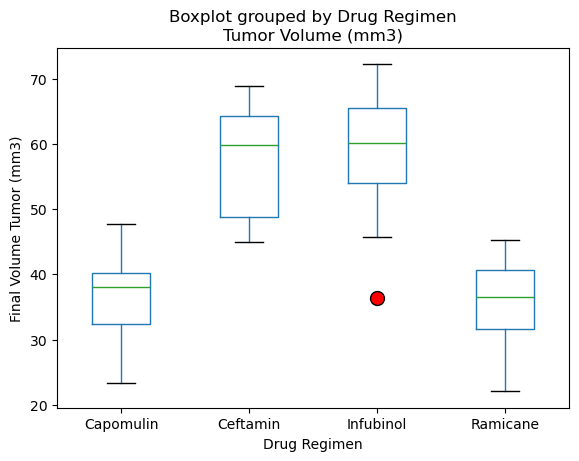

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
filtered_df=merged_df.loc[(merged_df["Drug Regimen"]=='Capomulin') | (merged_df["Drug Regimen"]=='Ramicane') | (merged_df["Drug Regimen"]=='Infubinol') |  (merged_df["Drug Regimen"]=='Ceftamin'), :]
filtered_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", grid=False, flierprops=dict(marker='o', markerfacecolor='red', markersize=10) )
plt.ylabel("Final Volume Tumor (mm3)")
plt.show()

## Line and Scatter Plots

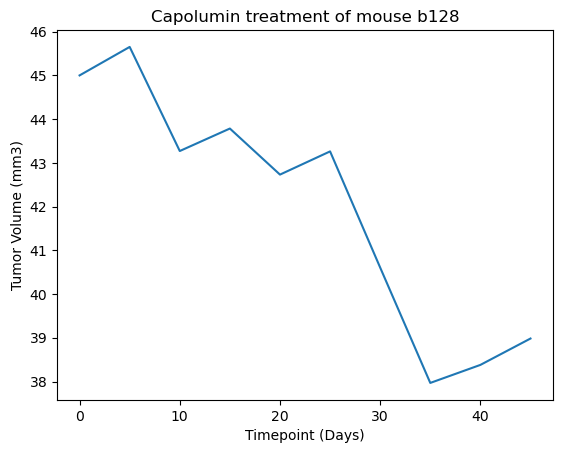

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
one_mouse_data=clean_df.loc[(clean_df["Mouse ID"]=="b128") & (clean_df["Drug Regimen"]=="Capomulin"),:]
x_axis=one_mouse_data["Timepoint"]
y_axis=one_mouse_data["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capolumin treatment of mouse b128")
plt.show()

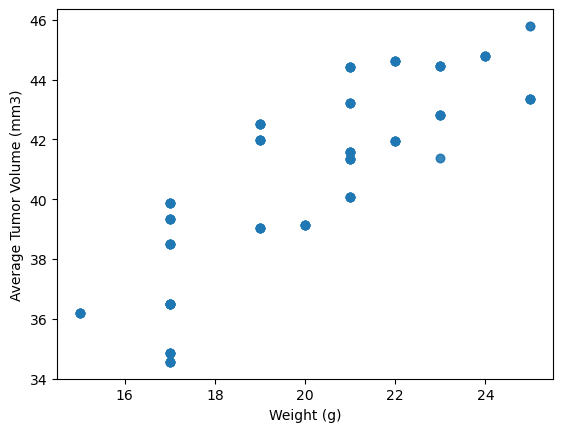

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Finding average observed tumor volume for each mouse
capomulin_data=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
groupby_capomulin_data=capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
groupby_capomulin_data=groupby_capomulin_data.reset_index(drop=False)
groupby_capomulin_data=groupby_capomulin_data.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
merged_capomulin_data=pd.merge(capomulin_data,groupby_capomulin_data, on="Mouse ID")

x_values_scatter=merged_capomulin_data["Weight (g)"]
y_values_scatter=merged_capomulin_data["Average Tumor Volume (mm3)"]

plt.scatter(x_values_scatter, y_values_scatter, marker='o', facecolor='#1f77b4', alpha=0.5)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

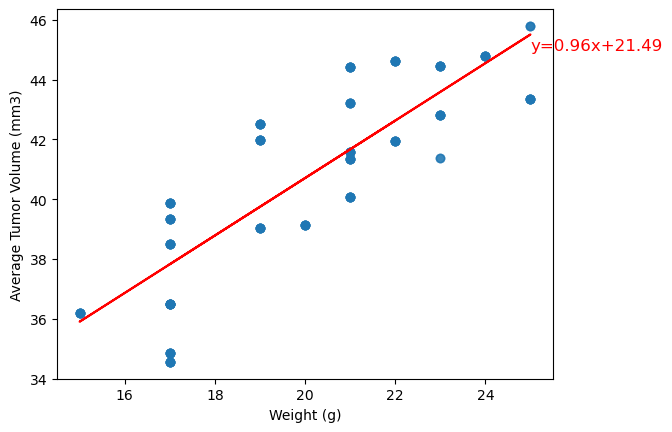

The correlation between the mouse weight and the average tumor volume (mm3) is 0.83 


In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values_scatter, y_values_scatter)

regress_values=(x_values_scatter*slope)+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x_values_scatter, y_values_scatter, marker='o', facecolor='#1f77b4', alpha=0.5)
plt.plot(x_values_scatter,regress_values,"r-")
plt.annotate(line_eq,(25,45),fontsize=12, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(r, p_value)=st.pearsonr(x_values_scatter, y_values_scatter)
new_r=round(r,2)

plt.show()

print(f"The correlation between the mouse weight and the average tumor volume (mm3) is {new_r} ")
